### Seleksi Baris Berdasarkan Kondisi

In [12]:
import pandas as pd
import geopandas as gpd

# Membaca data geospatial
gdf = gpd.read_file("./data/covid19/")

# Mengubah kolom menjadi tipe numerik (int atau float), jika diperlukan untuk merubah tipe data
gdf['Total Case'] = pd.to_numeric(gdf['Total Case'], errors='coerce')
gdf['Population'] = pd.to_numeric(gdf['Population'], errors='coerce')

# Seleksi total kasus dengan jumlah lebih dari 50_000
gdf_filtered = gdf[gdf['Total Case'] > 50000]
gdf_filtered.head()

,OBJECTID,PROVINSI,Shape_Leng,Shape_Area,Date,Location I,New Cases,New Deaths,New Recove,New Active,...,New Case_1,Total Ca_1,New Deat_1,Total De_1,Total De_2,Case Fatal,Case Recov,Growth Fac,Growth F_1,geometry
1,2,BALI,6.026646,0.458717,9/15/2022,ID-BA,38,1,6,31,...,9.01,39569.32,0.24,1122.11,112.21,2.84%,96.88%,6.33,None,"MULTIPOLYGON Z (((115.12509 -8.84761 0.00003, ..."
2,3,BANTEN,9.282228,0.764911,9/15/2022,ID-BT,240,0,32,208,...,22.38,31138.16,0.00,275.13,27.51,0.88%,98.38%,1.83,1.00,"MULTIPOLYGON Z (((105.54977 -6.99566 0.00003, ..."
4,5,DAERAH ISTIMEWA YOGYAKARTA,3.342892,0.260130,9/15/2022,ID-YO,27,0,0,27,...,7.44,61775.29,0.00,1632.60,163.26,2.64%,97.06%,2.25,1.00,"MULTIPOLYGON Z (((110.8198 -8.20358 0.00003, 1..."
5,6,DKI JAKARTA,3.123689,0.053426,9/15/2022,ID-JK,1116,0,58,1058,...,102.89,130231.62,0.00,1430.28,143.03,1.10%,98.13%,0.91,0.00,"MULTIPOLYGON Z (((106.87677 -6.1003 0.00003, 1..."
8,9,JAWA BARAT,11.614950,3.032785,9/15/2022,ID-JB,492,0,79,413,...,10.89,25989.74,0.00,352.89,35.29,1.36%,97.50%,2.58,1.00,"MULTIPOLYGON Z (((108.68501 -6.7699 0.00003, 1..."


### Seleksi Berdasarkan Beberapa Kondisi

In [18]:
# Seleksi total kasus dengan jumlah lebih dari 50_000 dan jumlah populasi lebih dari 10_000_000
gdf_filtered = gdf[(gdf['Population'] > 10000000) & (gdf['Total Case'] > 50000)]
gdf_filtered.head()

,OBJECTID,PROVINSI,Shape_Leng,Shape_Area,Date,Location I,New Cases,New Deaths,New Recove,New Active,...,New Case_1,Total Ca_1,New Deat_1,Total De_1,Total De_2,Case Fatal,Case Recov,Growth Fac,Growth F_1,geometry
2,3,BANTEN,9.282228,0.764911,9/15/2022,ID-BT,240,0,32,208,...,22.38,31138.16,0.00,275.13,27.51,0.88%,98.38%,1.83,1.00,"MULTIPOLYGON Z (((105.54977 -6.99566 0.00003, ..."
5,6,DKI JAKARTA,3.123689,0.053426,9/15/2022,ID-JK,1116,0,58,1058,...,102.89,130231.62,0.00,1430.28,143.03,1.10%,98.13%,0.91,0.00,"MULTIPOLYGON Z (((106.87677 -6.1003 0.00003, 1..."
8,9,JAWA BARAT,11.614950,3.032785,9/15/2022,ID-JB,492,0,79,413,...,10.89,25989.74,0.00,352.89,35.29,1.36%,97.50%,2.58,1.00,"MULTIPOLYGON Z (((108.68501 -6.7699 0.00003, 1..."
9,10,JAWA TENGAH,15.456349,2.819838,9/15/2022,ID-JT,108,0,2,106,...,2.97,17501.04,0.00,920.94,92.09,5.26%,94.52%,0.88,0.00,"MULTIPOLYGON Z (((108.88353 -7.74846 0.00003, ..."
10,11,JAWA TIMUR,33.571284,3.938320,9/15/2022,ID-JI,268,0,43,225,...,6.62,14860.66,0.00,784.70,78.47,5.28%,94.59%,5.06,0.00,"MULTIPOLYGON Z (((114.20384 -8.65725 0.00003, ..."


### Seleksi Kolom Tertentu

In [19]:
gdf_selected_columns = gdf[['PROVINSI', 'Population', 'Total Case']]
gdf_selected_columns.head()

,PROVINSI,Population,Total Case
0,ACEH,5247257,44038
1,BALI,4216171,166831
2,BANTEN,10722374,333875
3,BENGKULU,1999539,29173
4,DAERAH ISTIMEWA YOGYAKARTA,3631015,224307


### Seleksi Berdasarkan Jenis Geometri

In [21]:
# Seleksi hanya objek dengan geometri titik (Point)
points_only = gdf[gdf.geometry.type == 'Point']
points_only.head()

,OBJECTID,PROVINSI,Shape_Leng,Shape_Area,Date,Location I,New Cases,New Deaths,New Recove,New Active,...,New Case_1,Total Ca_1,New Deat_1,Total De_1,Total De_2,Case Fatal,Case Recov,Growth Fac,Growth F_1,geometry


In [22]:
# Seleksi hanya objek dengan geometri poligon (Polygon)
polygons_only = gdf[gdf.geometry.type == 'Polygon']
polygons_only.head()

,OBJECTID,PROVINSI,Shape_Leng,Shape_Area,Date,Location I,New Cases,New Deaths,New Recove,New Active,...,New Case_1,Total Ca_1,New Deat_1,Total De_1,Total De_2,Case Fatal,Case Recov,Growth Fac,Growth F_1,geometry


In [26]:
# Seleksi hanya objek dengan geometri multi poligon (MultiPolygon)
multi_polygons_only = gdf[gdf.geometry.type == 'MultiPolygon']
multi_polygons_only.head()

,OBJECTID,PROVINSI,Shape_Leng,Shape_Area,Date,Location I,New Cases,New Deaths,New Recove,New Active,...,New Case_1,Total Ca_1,New Deat_1,Total De_1,Total De_2,Case Fatal,Case Recov,Growth Fac,Growth F_1,geometry
0,1,ACEH,27.455786,4.625436,9/15/2022,ID-AC,20,0,1,19,...,3.81,8392.58,0.00,423.65,42.36,5.05%,94.72%,2.50,1.00,"MULTIPOLYGON Z (((97.39178 2.03748 0.00003, 97..."
1,2,BALI,6.026646,0.458717,9/15/2022,ID-BA,38,1,6,31,...,9.01,39569.32,0.24,1122.11,112.21,2.84%,96.88%,6.33,None,"MULTIPOLYGON Z (((115.12509 -8.84761 0.00003, ..."
2,3,BANTEN,9.282228,0.764911,9/15/2022,ID-BT,240,0,32,208,...,22.38,31138.16,0.00,275.13,27.51,0.88%,98.38%,1.83,1.00,"MULTIPOLYGON Z (((105.54977 -6.99566 0.00003, ..."
3,4,BENGKULU,11.706367,1.630129,9/15/2022,ID-BE,4,0,0,4,...,2.00,14589.86,0.00,261.06,26.11,1.79%,98.09%,0.50,1.00,"MULTIPOLYGON Z (((102.38616 -5.47144 0.00003, ..."
4,5,DAERAH ISTIMEWA YOGYAKARTA,3.342892,0.260130,9/15/2022,ID-YO,27,0,0,27,...,7.44,61775.29,0.00,1632.60,163.26,2.64%,97.06%,2.25,1.00,"MULTIPOLYGON Z (((110.8198 -8.20358 0.00003, 1..."


### Seleksi Berdasarkan Bounding Box (Batas Minimum)

<Axes: >

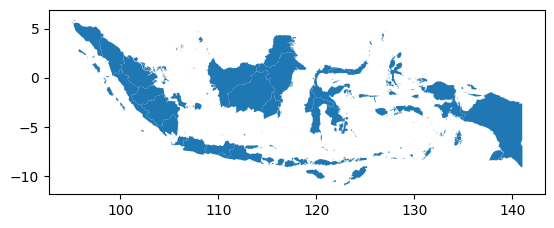

In [27]:
gdf.plot() # contoh full box

In [28]:
minx, miny, maxx, maxy = 100.0, -5.0, 120.0, 5.0  # Definisi bounding box

# Membuat poligon bounding box
from shapely.geometry import box
bbox = box(minx, miny, maxx, maxy)

# Seleksi objek yang berada dalam bounding box
gdf_within_bbox = gdf[gdf.geometry.within(bbox)]
gdf_within_bbox.head()

,OBJECTID,PROVINSI,Shape_Leng,Shape_Area,Date,Location I,New Cases,New Deaths,New Recove,New Active,...,New Case_1,Total Ca_1,New Deat_1,Total De_1,Total De_2,Case Fatal,Case Recov,Growth Fac,Growth F_1,geometry
7,8,JAMBI,11.835072,3.977711,9/15/2022,ID-JA,8,0,0,8,...,2.29,11061.85,0.00,254.48,25.45,2.30%,97.51%,8.00,1.00,"MULTIPOLYGON Z (((104.40714 -0.86371 0.00003, ..."
11,12,KALIMANTAN BARAT,39.643678,11.962830,9/15/2022,ID-KB,17,0,0,17,...,3.13,12097.96,0.00,208.75,20.87,1.73%,98.12%,8.50,1.00,"MULTIPOLYGON Z (((110.20398 -3.06463 0.00003, ..."
12,13,KALIMANTAN SELATAN,26.450935,2.989879,9/15/2022,ID-KS,20,0,0,20,...,4.97,21743.71,0.00,642.05,64.21,2.95%,96.87%,None,1.00,"MULTIPOLYGON Z (((115.66725 -4.74446 0.00003, ..."
13,14,KALIMANTAN TENGAH,23.242004,12.531139,9/15/2022,ID-KT,13,0,1,12,...,5.06,22649.98,0.00,608.88,60.89,2.69%,97.00%,0.93,1.00,"MULTIPOLYGON Z (((114.25716 -3.38189 0.00003, ..."
14,15,KALIMANTAN TIMUR,58.195153,10.260775,9/15/2022,ID-KI,26,0,9,17,...,7.32,58841.71,0.00,1611.96,161.20,2.74%,97.13%,2.89,1.00,"MULTIPOLYGON Z (((116.46151 -2.19154 0.00003, ..."


<Axes: >

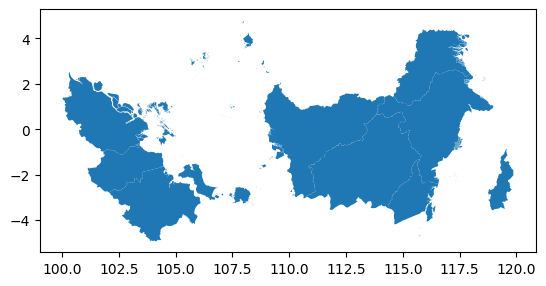

In [29]:
gdf_within_bbox.plot() # hasil plot setelah seleksi berdasarkan bounding box

### Seleksi Berdasarkan Jarak

In [31]:
from shapely.geometry import Point

# Definisi titik pusat
center_point = Point(106.8272, -6.1751)  # Koordinat Jakarta

# Menghitung jarak dari titik pusat
gdf['distance_to_center'] = gdf.geometry.distance(center_point)

# Seleksi kota yang berjarak kurang dari 50 km dari titik pusat
gdf_nearby = gdf[gdf['distance_to_center'] <= 0.5]  # Konversi ke satuan yang sesuai dengan CRS
gdf_nearby.head()

/var/folders/0c/s4bn1y5d3k3243ym_hrjnyqh0000gp/T/ipykernel_91186/4270021509.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['distance_to_center'] = gdf.geometry.distance(center_point)


,OBJECTID,PROVINSI,Shape_Leng,Shape_Area,Date,Location I,New Cases,New Deaths,New Recove,New Active,...,Total Ca_1,New Deat_1,Total De_1,Total De_2,Case Fatal,Case Recov,Growth Fac,Growth F_1,geometry,distance_to_center
2,3,BANTEN,9.282228,0.764911,9/15/2022,ID-BT,240,0,32,208,...,31138.16,0.00,275.13,27.51,0.88%,98.38%,1.83,1.00,"MULTIPOLYGON Z (((105.54977 -6.99566 0.00003, ...",0.098802
5,6,DKI JAKARTA,3.123689,0.053426,9/15/2022,ID-JK,1116,0,58,1058,...,130231.62,0.00,1430.28,143.03,1.10%,98.13%,0.91,0.00,"MULTIPOLYGON Z (((106.87677 -6.1003 0.00003, 1...",0.000000
8,9,JAWA BARAT,11.614950,3.032785,9/15/2022,ID-JB,492,0,79,413,...,25989.74,0.00,352.89,35.29,1.36%,97.50%,2.58,1.00,"MULTIPOLYGON Z (((108.68501 -6.7699 0.00003, 1...",0.115256
